userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64
Ratings Duplicates: 0
Movies Duplicates: 0
Train data shape: (488, 9724)
Test data shape: (122, 9724)


<ipython-input-5-d45fe071845e>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x='rating', palette='viridis')


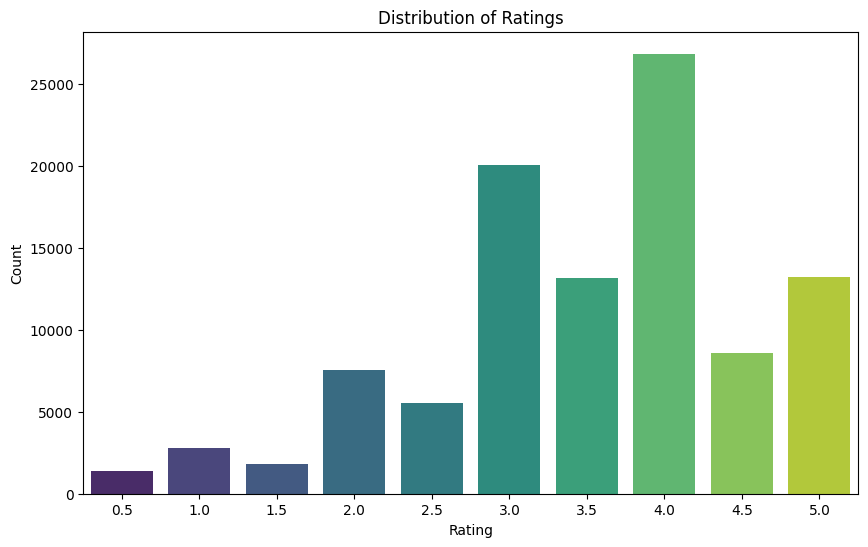

<ipython-input-5-d45fe071845e>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_ratings.sort_values(by='rating', ascending=False).head(20), x='rating', y='title', palette='coolwarm')


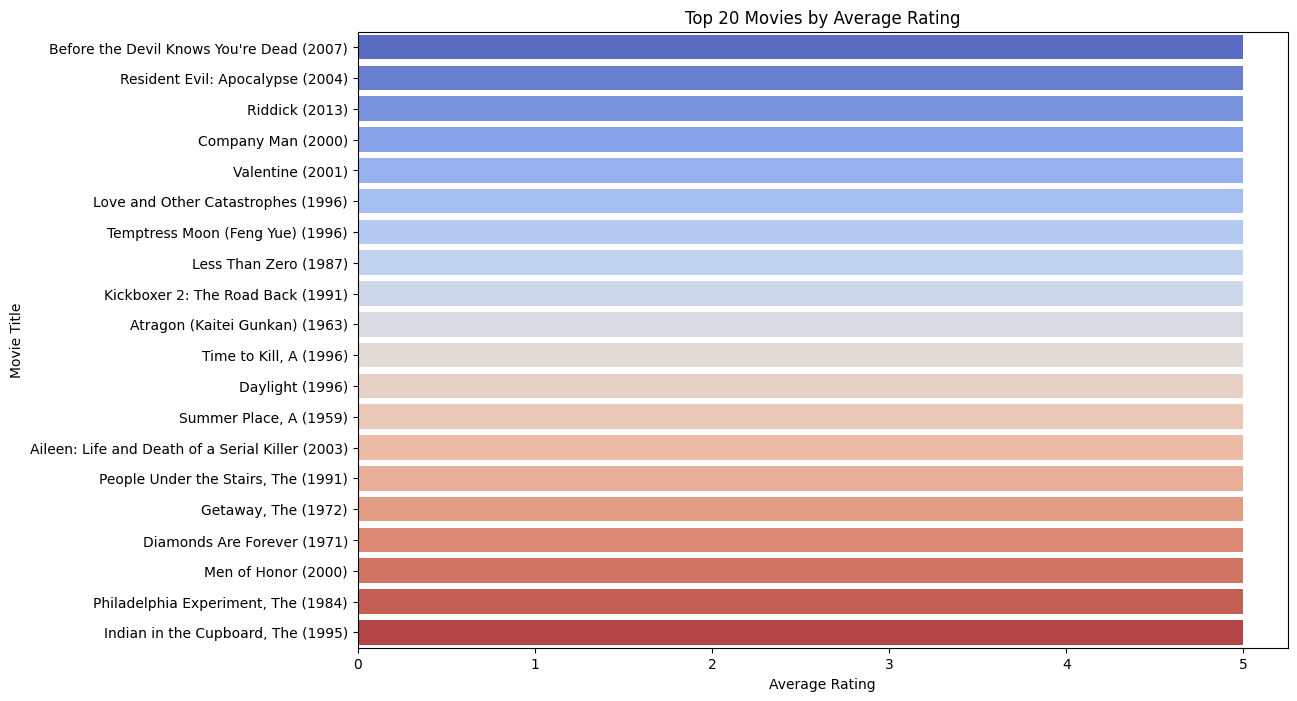

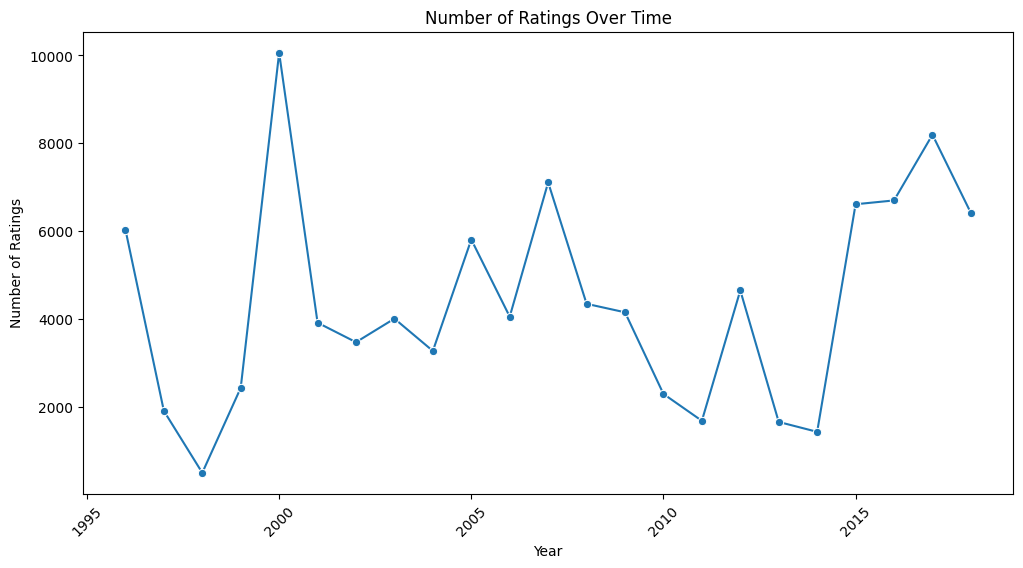

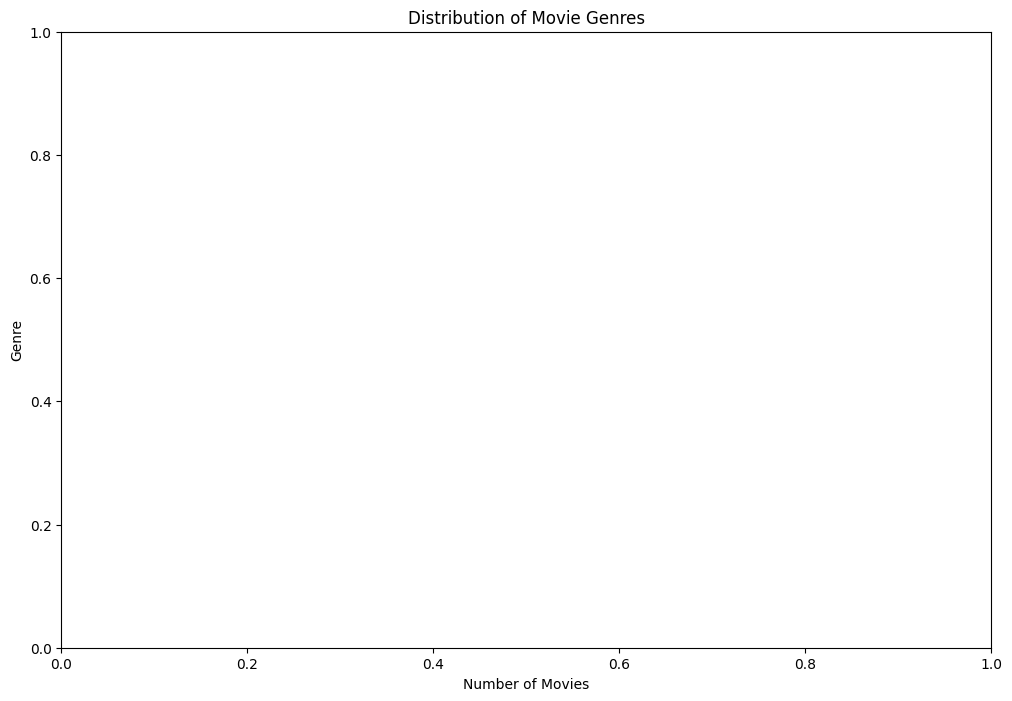

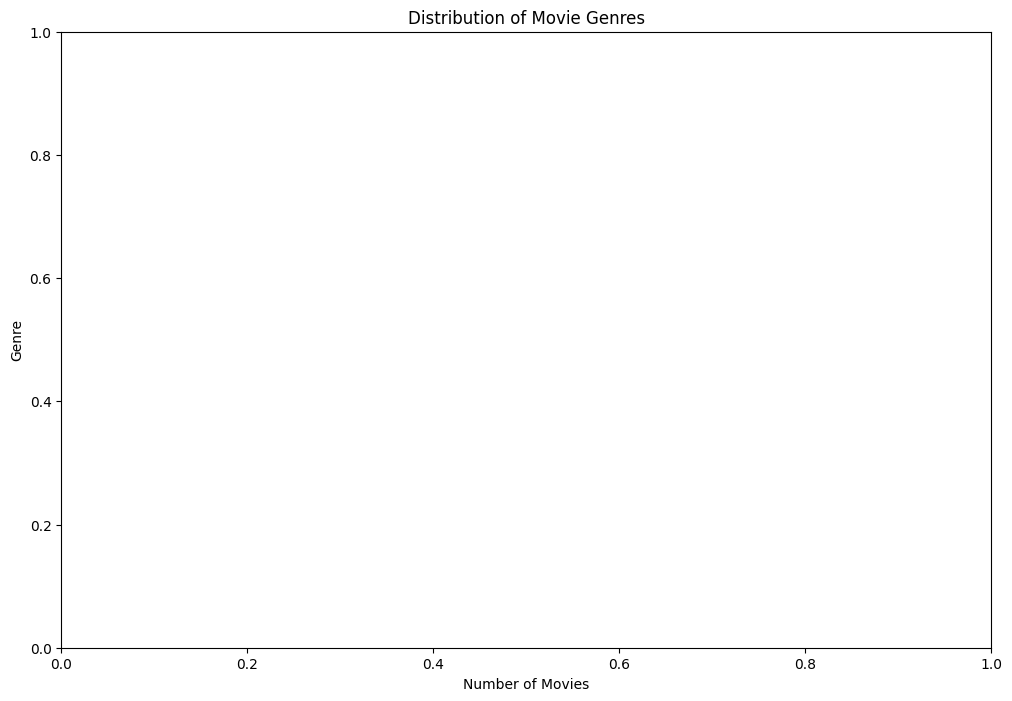

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Check for missing values
print(ratings.isnull().sum())
print(movies.isnull().sum())

# Drop rows with missing values (if necessary)
ratings.dropna(inplace=True)
movies.dropna(inplace=True)

# Check for duplicates
print(f'Ratings Duplicates: {ratings.duplicated().sum()}')
print(f'Movies Duplicates: {movies.duplicated().sum()}')

# Remove duplicates
ratings.drop_duplicates(inplace=True)
movies.drop_duplicates(inplace=True)

# Convert genres into a list of genres
movies['genres'] = movies['genres'].str.split('|')

# Encode movie titles
label_encoder = LabelEncoder()
movies['movieId'] = label_encoder.fit_transform(movies['movieId'])

# Create a user-item matrix
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

# Split the data into training and testing sets
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')




# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=ratings, x='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



# Calculate average ratings
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
average_ratings = average_ratings.merge(movies[['movieId', 'title']], on='movieId')

# Plotting average ratings
plt.figure(figsize=(12, 8))
sns.barplot(data=average_ratings.sort_values(by='rating', ascending=False).head(20), x='rating', y='title', palette='coolwarm')
plt.title('Top 20 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()



# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Extract year from timestamp
ratings['year'] = ratings['timestamp'].dt.year

# Count ratings per year
ratings_per_year = ratings.groupby('year')['rating'].count().reset_index()

# Plotting ratings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=ratings_per_year, x='year', y='rating', marker='o')
plt.title('Number of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()


# Split genres and explode the DataFrame
movies['genres'] = movies['genres'].str.split('|')
genres_exploded = movies.explode('genres')

# Count the number of movies per genre
genre_counts = genres_exploded['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Plotting genre distribution
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_counts, x='Count', y='Genre', palette='Set2')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


# Save the last plot as an image
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_counts, x='Count', y='Genre', palette='Set2')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.savefig('genre_distribution.png')
